#01-data-exploration
In this notebook, we will explore the Higgs boson dataset to gain a better understanding of the data and its properties. We will perform some initial data analysis, such as checking for missing values, identifying the distribution of each feature, and visualizing the relationships between different features. This will help us determine any preprocessing steps that may be required before building and training our models.

#Importing Libraries
In this section, we will import the necessary libraries and packages that will be used throughout the notebook.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

#Loading Data
Here, we will load the Higgs boson dataset into a pandas DataFrame and inspect the data to get a better understanding of the data structure and format.

In [3]:
# Load data from CSV file into a pandas DataFrame
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

# Load data from Google Drive
data_path = '/content/drive/MyDrive/Higgs_dataset/raw/HIGGS_train.csv'

# Read the CSV file using pandas read_csv function
data = pd.read_csv(data_path, header=None, low_memory=False)

# Save the loaded data as a pickle file for faster loading in the future
#data.to_pickle('HIGGS_train.pkl')

# Load data from a pickle file
#data = pd.read_pickle('HIGGS_train.pkl')

# Display the loaded DataFrame
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869,-0.635,0.226,0.327,-0.690,0.754,-0.249,-1.09E+00,0.00,...,-0.0105,-0.045800,3.10E+00,1.350,0.980,0.978,0.920,0.722,0.989,0.877
1,1.0,0.908,0.329,0.359,1.500,-0.313,1.100,-0.558,-1.59E+00,2.17,...,-1.1400,-0.000819,0.00E+00,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1.0,0.799,1.470,-1.640,0.454,0.426,1.100,1.280,1.38E+00,0.00,...,1.1300,0.900000,0.00E+00,0.910,1.110,0.986,0.951,0.803,0.866,0.780
3,0.0,1.340,-0.877,0.936,1.990,0.882,1.790,-1.650,-9.42E-01,0.00,...,-0.6780,-1.360000,0.00E+00,0.947,1.030,0.999,0.728,0.869,1.030,0.958
4,1.0,1.110,0.321,1.520,0.883,-1.210,0.681,-1.070,-9.22E-01,0.00,...,-0.3740,0.113000,0.00E+00,0.756,1.360,0.987,0.838,1.130,0.872,0.808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.0,0.680,0.223,-0.757,0.418,-0.323,0.471,-0.394,1.03E-01,0.00,...,-2.4600,1.460000,0.00E+00,0.823,1.040,0.985,0.868,0.258,0.776,0.712
599996,1.0,1.610,-1.620,0.212,0.716,-0.906,0.553,-0.908,-1.56E+00,2.17,...,0.5380,-0.490000,3.10E+00,0.810,0.643,1.260,1.020,0.626,0.773,0.701
599997,1.0,1.070,0.364,0.344,0.617,-1.430,0.675,0.159,7.89E-02,0.00,...,0.9780,1.150000,3.10E+00,0.973,0.974,1.130,0.969,0.852,0.908,0.789
599998,1.0,1.180,-0.173,-1.460,0.735,-0.753,1.020,-0.838,1.23E+00,0.00,...,0.1070,0.622000,0.00E+00,0.812,1.240,0.986,0.694,0.745,0.741,0.728


#Preprocessing
In this section, we will preprocess the data by performing necessary data cleaning, normalization, and feature engineering. We will also split the dataset into training and validation sets for model training and evaluation.

In [9]:
# Assign column names
cols = ["class_label", "lep_pt", "lep_eta", "lep_phi", "miss_energy_mag", "miss_energy_phi", 
        "jet1_pt", "jet1_eta", "jet1_phi", "jet1_btag", "jet2_pt", "jet2_eta", "jet2_phi", 
        "jet2_btag", "jet3_pt", "jet3_eta", "jet3_phi", "jet3_btag", "jet4_pt", "jet4_eta", 
        "jet4_phi", "jet4_btag", "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]
data.columns = cols

# Check for missing or invalid values
print("Check for missing or invalid values")
print(data.isna().sum())

# Drop rows with missing values, if any
data = data.dropna()

# Check data types of each column
print("Check data types of each column: ")
print(data.dtypes)

# Create a new, independent copy of the DataFrame
data_clean = data.copy()

# Iterate through each column
for column in data_clean.columns:
    # Replace non-numeric values with NaN and convert the column to float64
    newvals = pd.to_numeric(data_clean[column], errors='coerce')
    data_clean.loc[:, column] = newvals  # This line is modified to avoid the warning

    # Replace NaN values with the mean of the respective column
    data_clean.loc[:, column] = data_clean[column].fillna(data_clean[column].mean())

# Check data types of each column after cleaning
print("Check data types of each column after cleaning: ")
print(data_clean.dtypes)

# Separate the class_label column
class_labels = data_clean['class_label']

# Select only the feature columns (exclude the class_label column)
feature_columns = data_clean.drop('class_label', axis=1)

# Normalize the feature columns
scaler = StandardScaler()
normalized_features = scaler.fit_transform(feature_columns)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=feature_columns.columns)

# Reset the indices of both DataFrames
class_labels = class_labels.reset_index(drop=True)
normalized_features_df = normalized_features_df.reset_index(drop=True)

# Add the class_label column back to the DataFrame
normalized_data = pd.concat([class_labels, normalized_features_df], axis=1)

Check for missing or invalid values
class_label        0
lep_pt             0
lep_eta            0
lep_phi            0
miss_energy_mag    0
miss_energy_phi    0
jet1_pt            0
jet1_eta           0
jet1_phi           0
jet1_btag          0
jet2_pt            0
jet2_eta           0
jet2_phi           0
jet2_btag          0
jet3_pt            0
jet3_eta           0
jet3_phi           0
jet3_btag          0
jet4_pt            0
jet4_eta           0
jet4_phi           0
jet4_btag          0
m_jj               0
m_jjj              0
m_lv               0
m_jlv              0
m_bb               0
m_wbb              0
m_wwbb             0
dtype: int64
Check data types of each column: 
class_label        float64
lep_pt             float64
lep_eta            float64
lep_phi            float64
miss_energy_mag    float64
miss_energy_phi    float64
jet1_pt            float64
jet1_eta           float64
jet1_phi            object
jet1_btag          float64
jet2_pt            float64
jet2_eta   

<ipython-input-9-29e4c905e7a9>:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_clean.loc[:, column] = newvals  # This line is modified to avoid the warning


Check data types of each column after cleaning: 
class_label        float64
lep_pt             float64
lep_eta            float64
lep_phi            float64
miss_energy_mag    float64
miss_energy_phi    float64
jet1_pt            float64
jet1_eta           float64
jet1_phi           float64
jet1_btag          float64
jet2_pt            float64
jet2_eta           float64
jet2_phi           float64
jet2_btag          float64
jet3_pt            float64
jet3_eta           float64
jet3_phi           float64
jet3_btag          float64
jet4_pt            float64
jet4_eta           float64
jet4_phi           float64
jet4_btag          float64
m_jj               float64
m_jjj              float64
m_lv               float64
m_jlv              float64
m_bb               float64
m_wbb              float64
m_wwbb             float64
dtype: object


#Exploratory Data Analysis
In this section, we will perform exploratory data analysis by visualizing and analyzing the data to identify any patterns, trends, or relationships between different features. We will also identify any potential issues or anomalies in the data.

Number of rows and columns:  (599999, 29)


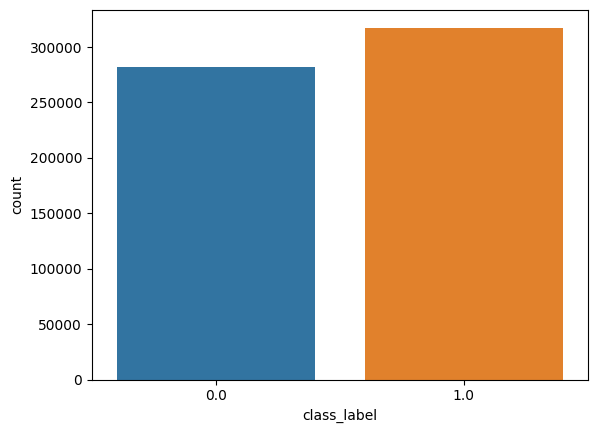

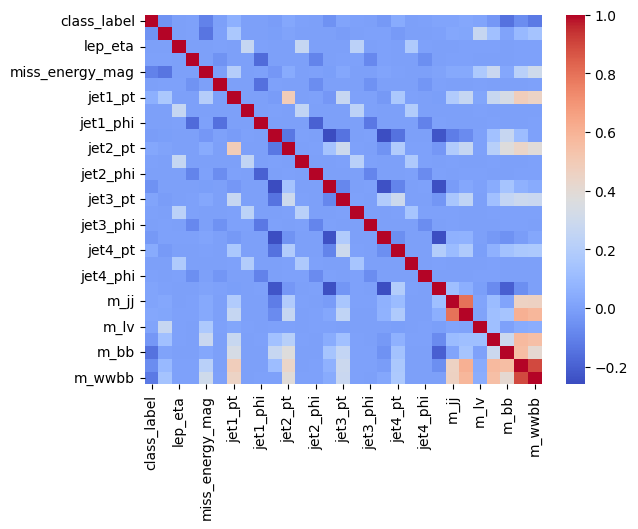

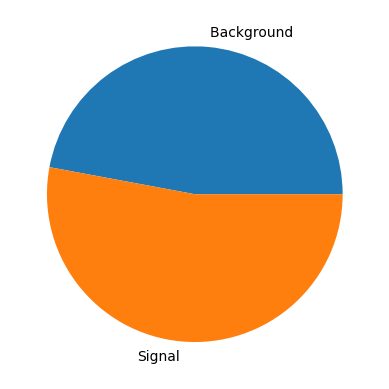

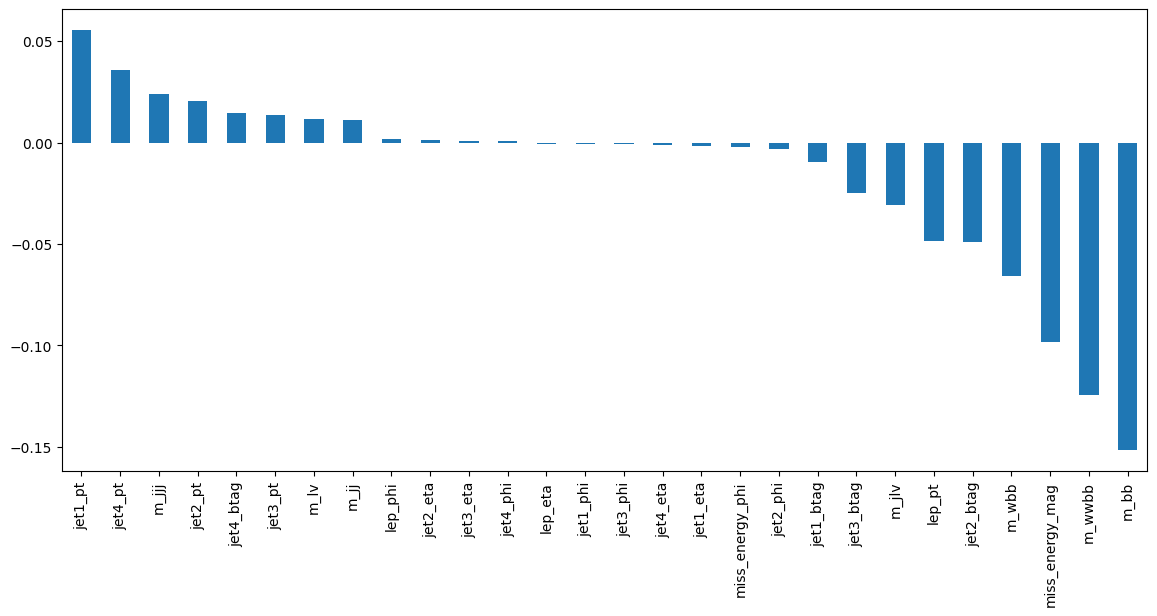

In [7]:
# Print the number of rows and columns in the dataset
print("Number of rows and columns: ", normalized_data.shape)

# Plot a count plot of the class label
sns.countplot(data=normalized_data, x="class_label")
plt.show()

# Plot a correlation matrix of the features
corr = normalized_data.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.show()

#create a pie chart to visualize the proportion of signal and background events in the dataset
counts_signal = normalized_data['class_label'].value_counts()[1]
counts_background = normalized_data['class_label'].value_counts()[0]
plt.pie( [counts_background,counts_signal], labels=['Background ','Signal'] )
plt.show()

#Compute the correlation coefficients between each feature and the class_label
corr_with_label = normalized_data.corr()['class_label'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_label.drop('class_label').plot.bar()
plt.show()

# Save the data to pickle file
# normalized_data.to_csv('HIGGS_processed.csv', index=False)
# normalized_data.to_pickle('HIGGS_processed.pkl')

#Splitting The Dataset

In this section, we will split the dataset into three parts: training, validation, and test sets. The training set will be used to train the XGBoost model, the validation set will be used to tune the model's hyperparameters and prevent overfitting, and the test set will be used to evaluate the model's performance on unseen data. We will be using a 60% training, 20% validation, and 20% test split. Once the data is split, we will save each set to a CSV file for further use.

In [8]:
# Split the data into 60% training, 20% validation, and 20% testing
train_data, test_data = train_test_split(normalized_data, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Save the data to pickle files
train_data.to_pickle('training_data.pkl')
val_data.to_pickle('validation_data.pkl')
test_data.to_pickle('testing_data.pkl')